# Census Income Data Set 

Abstract: Predict whether income exceeds $50K/yr based on census data. Also known as "Adult" dataset.

In [1]:
import pandas as pd
import numpy as np
from tqdm import tqdm_notebook
from matplotlib import pyplot as plt
from scipy import stats
%matplotlib inline

# Load the Data

In [2]:
col_names=['age',
            'workclass',
            'fnlwgt',
            'education',
            'education-num',
            'marital-status',
            'occupation',
            'relationship',
            'race',
            'sex',
            'capital-gain',
            'capital-loss',
            'hours-per-week',
            'native-country',
            'inc_class']


In [3]:
ds=pd.read_csv('adult.data', ',', names=col_names, index_col=False)
ds.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,inc_class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
ds.shape

(32561, 15)

# Categorical features

In [5]:
import category_encoders as ce

In [6]:
ds.dtypes[ds.dtypes=='object'].index


Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'native-country', 'inc_class'],
      dtype='object')

In [7]:
ce_bin = ce.BinaryEncoder(cols = list(ds.dtypes[ds.dtypes=='object'].index))
ce_bin.fit_transform(ds)

,age,workclass_0,workclass_1,workclass_2,workclass_3,workclass_4,fnlwgt,education_0,education_1,education_2,...,hours-per-week,native-country_0,native-country_1,native-country_2,native-country_3,native-country_4,native-country_5,native-country_6,inc_class_0,inc_class_1
0,39,0,0,0,0,1,77516,0,0,0,...,40,0,0,0,0,0,0,1,0,1
1,50,0,0,0,1,0,83311,0,0,0,...,13,0,0,0,0,0,0,1,0,1
2,38,0,0,0,1,1,215646,0,0,0,...,40,0,0,0,0,0,0,1,0,1
3,53,0,0,0,1,1,234721,0,0,0,...,40,0,0,0,0,0,0,1,0,1
4,28,0,0,0,1,1,338409,0,0,0,...,40,0,0,0,0,0,1,0,0,1
5,37,0,0,0,1,1,284582,0,0,1,...,40,0,0,0,0,0,0,1,0,1
6,49,0,0,0,1,1,160187,0,0,1,...,16,0,0,0,0,0,1,1,0,1
7,52,0,0,0,1,0,209642,0,0,0,...,45,0,0,0,0,0,0,1,1,0
8,31,0,0,0,1,1,45781,0,0,1,...,50,0,0,0,0,0,0,1,1,0
9,42,0,0,0,1,1,159449,0,0,0,...,40,0,0,0,0,0,0,1,1,0


# Algorithms

In [8]:
from sklearn.model_selection import train_test_split

#set x and y
#classification
ds_clf=ds.drop(['inc_class'], axis=1)
#binary encoding
ce_bin = ce.BinaryEncoder(cols = list(ds_clf.dtypes[ds_clf.dtypes=='object'].index))
ds_clf_bin_enc=ce_bin.fit_transform(ds_clf)
y_clf=[0 if ic==' <=50K' else 1 for ic in ds.inc_class]
#Train/test split
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(ds_clf_bin_enc, y_clf, test_size=0.33, random_state=42)


#regression
ds_reg = ds.drop(['age'], axis=1)
ce_bin = ce.BinaryEncoder(cols = list(ds_reg.dtypes[ds_reg.dtypes=='object'].index))
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(ce_bin.fit_transform(ds_reg), ds.age, test_size=0.33, random_state=42)


In [9]:
X_train_c.shape

(21815, 42)

## Dimensionality reduction

In [10]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

### PCA

In [11]:
pca = PCA(n_components=2)
x_pca_clf=pca.fit_transform(ds_clf_bin_enc)
X_train_c2D, X_test_c2D, y_train_c2D, y_test_c2D = train_test_split(x_pca_clf, y_clf, test_size=0.33, random_state=42)


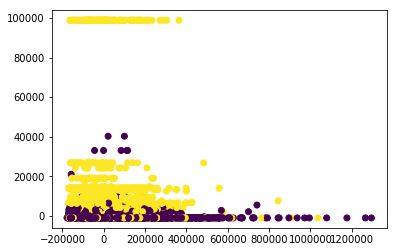

In [12]:
plt.scatter(x_pca_clf[:,0], x_pca_clf[:,1], c=y_clf)

### TSNE

In [13]:
tsne=TSNE(n_components=2)
x_tsne_clf=tsne.fit_transform(ds_clf_bin_enc)
X_train_c2D2, X_test_c2D2, y_train_c2D2, y_test_c2D2 = train_test_split(x_tsne_clf, y_clf, test_size=0.33, random_state=42)

KeyboardInterrupt: 

In [ ]:
plt.scatter(x_tsne_clf[:,0], x_tsne_clf[:,1], c=y_clf)

## Neural network

In [23]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from keras.callbacks import ModelCheckpoint

In [32]:
# create model
model = Sequential()
model.add(Dense(8, input_dim=X_train_c.shape[1], activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# load weights
import os
if os. path. isfile('model.best.hdf5'):
    model.load_weights("model.best.hdf5")
    print("Created model and loaded weights from file")
    
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adamax', metrics=['accuracy'])

In [25]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 8)                 344       
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 9         
Total params: 353
Trainable params: 353
Non-trainable params: 0
_________________________________________________________________


In [33]:
# checkpoint
filepath="model.best.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

In [34]:
history = model.fit(
    X_train_c, 
    y_train_c, 
    epochs=100, 
    batch_size=32, 
    verbose=1, 
    validation_split=0.2, 
    callbacks=callbacks_list, 
    use_multiprocessing=True
)


Train on 17452 samples, validate on 4363 samples
Epoch 1/100
17452/17452 [==============================] - ETA: 51s - loss: 2932.8801 - accuracy: 0.62 - ETA: 1s - loss: 543.7705 - accuracy: 0.6398 - ETA: 1s - loss: 313.9789 - accuracy: 0.63 - ETA: 0s - loss: 221.5139 - accuracy: 0.63 - ETA: 0s - loss: 178.5849 - accuracy: 0.62 - ETA: 0s - loss: 153.2924 - accuracy: 0.62 - ETA: 0s - loss: 129.0258 - accuracy: 0.63 - ETA: 0s - loss: 112.3753 - accuracy: 0.63 - ETA: 0s - loss: 105.1874 - accuracy: 0.63 - ETA: 0s - loss: 95.6161 - accuracy: 0.6434 - ETA: 0s - loss: 87.2453 - accuracy: 0.647 - ETA: 0s - loss: 80.5497 - accuracy: 0.651 - ETA: 0s - loss: 74.6735 - accuracy: 0.654 - ETA: 0s - loss: 70.3946 - accuracy: 0.655 - 1s 52us/step - loss: 67.6993 - accuracy: 0.6578 - val_loss: 6.5460 - val_accuracy: 0.2436

Epoch 00001: val_accuracy improved from -inf to 0.24364, saving model to model.best.hdf5
Epoch 2/100
17452/17452 [==============================] - ETA: 1s - loss: 6.4218 - accurac

17452/17452 [==============================] - ETA: 1s - loss: 4.1051 - accuracy: 0.90 - ETA: 0s - loss: 7.2453 - accuracy: 0.72 - ETA: 0s - loss: 16.8612 - accuracy: 0.690 - ETA: 0s - loss: 15.5493 - accuracy: 0.692 - ETA: 0s - loss: 13.4106 - accuracy: 0.706 - ETA: 0s - loss: 14.3982 - accuracy: 0.695 - ETA: 0s - loss: 16.9932 - accuracy: 0.693 - ETA: 0s - loss: 15.4274 - accuracy: 0.696 - ETA: 0s - loss: 15.3516 - accuracy: 0.693 - ETA: 0s - loss: 15.3358 - accuracy: 0.693 - ETA: 0s - loss: 14.6983 - accuracy: 0.693 - ETA: 0s - loss: 14.2545 - accuracy: 0.696 - ETA: 0s - loss: 13.7353 - accuracy: 0.696 - ETA: 0s - loss: 13.6045 - accuracy: 0.695 - ETA: 0s - loss: 13.2671 - accuracy: 0.696 - 1s 47us/step - loss: 13.4562 - accuracy: 0.6966 - val_loss: 40.2741 - val_accuracy: 0.2434

Epoch 00010: val_accuracy did not improve from 0.79739
Epoch 11/100
17452/17452 [==============================] - ETA: 1s - loss: 42.6881 - accuracy: 0.218 - ETA: 0s - loss: 23.5814 - accuracy: 0.634 - ET

17452/17452 [==============================] - ETA: 1s - loss: 19.0434 - accuracy: 0.187 - ETA: 0s - loss: 4.9771 - accuracy: 0.717 - ETA: 0s - loss: 4.9862 - accuracy: 0.71 - ETA: 0s - loss: 6.5739 - accuracy: 0.71 - ETA: 0s - loss: 6.4801 - accuracy: 0.71 - ETA: 0s - loss: 6.1831 - accuracy: 0.71 - ETA: 0s - loss: 7.0400 - accuracy: 0.71 - ETA: 0s - loss: 6.9520 - accuracy: 0.71 - ETA: 0s - loss: 8.1478 - accuracy: 0.71 - ETA: 0s - loss: 8.7121 - accuracy: 0.71 - ETA: 0s - loss: 8.7441 - accuracy: 0.70 - ETA: 0s - loss: 9.6823 - accuracy: 0.70 - ETA: 0s - loss: 9.4800 - accuracy: 0.70 - ETA: 0s - loss: 9.5627 - accuracy: 0.70 - ETA: 0s - loss: 10.1601 - accuracy: 0.708 - 1s 48us/step - loss: 10.1798 - accuracy: 0.7075 - val_loss: 23.3759 - val_accuracy: 0.7868

Epoch 00019: val_accuracy did not improve from 0.79945
Epoch 20/100
17452/17452 [==============================] - ETA: 1s - loss: 12.1040 - accuracy: 0.906 - ETA: 0s - loss: 15.5834 - accuracy: 0.727 - ETA: 0s - loss: 16.3288

17452/17452 [==============================] - ETA: 2s - loss: 6.0881 - accuracy: 0.56 - ETA: 0s - loss: 17.1594 - accuracy: 0.661 - ETA: 0s - loss: 15.9441 - accuracy: 0.669 - ETA: 0s - loss: 12.9468 - accuracy: 0.696 - ETA: 0s - loss: 11.0033 - accuracy: 0.704 - ETA: 0s - loss: 11.3411 - accuracy: 0.703 - ETA: 0s - loss: 11.7179 - accuracy: 0.706 - ETA: 0s - loss: 11.0935 - accuracy: 0.709 - ETA: 0s - loss: 11.0350 - accuracy: 0.710 - ETA: 0s - loss: 11.1147 - accuracy: 0.713 - ETA: 0s - loss: 11.5727 - accuracy: 0.712 - ETA: 0s - loss: 11.1576 - accuracy: 0.714 - ETA: 0s - loss: 11.0511 - accuracy: 0.714 - ETA: 0s - loss: 10.7016 - accuracy: 0.716 - ETA: 0s - loss: 10.3741 - accuracy: 0.716 - 1s 47us/step - loss: 10.2765 - accuracy: 0.7175 - val_loss: 2.2064 - val_accuracy: 0.7976

Epoch 00028: val_accuracy did not improve from 0.79945
Epoch 29/100
17452/17452 [==============================] - ETA: 1s - loss: 2.9176 - accuracy: 0.65 - ETA: 0s - loss: 4.3200 - accuracy: 0.71 - ETA: 

17452/17452 [==============================] - ETA: 1s - loss: 1.5861 - accuracy: 0.81 - ETA: 0s - loss: 13.0976 - accuracy: 0.716 - ETA: 0s - loss: 12.6915 - accuracy: 0.705 - ETA: 0s - loss: 13.7015 - accuracy: 0.697 - ETA: 0s - loss: 11.3850 - accuracy: 0.708 - ETA: 0s - loss: 10.2362 - accuracy: 0.718 - ETA: 0s - loss: 9.4051 - accuracy: 0.725 - ETA: 0s - loss: 8.5358 - accuracy: 0.73 - ETA: 0s - loss: 8.1423 - accuracy: 0.72 - ETA: 0s - loss: 8.1444 - accuracy: 0.72 - ETA: 0s - loss: 8.1370 - accuracy: 0.72 - ETA: 0s - loss: 8.5561 - accuracy: 0.72 - ETA: 0s - loss: 8.7139 - accuracy: 0.72 - ETA: 0s - loss: 8.4776 - accuracy: 0.72 - ETA: 0s - loss: 8.4195 - accuracy: 0.72 - 1s 48us/step - loss: 8.5644 - accuracy: 0.7231 - val_loss: 2.1786 - val_accuracy: 0.7671

Epoch 00037: val_accuracy did not improve from 0.80380
Epoch 38/100
17452/17452 [==============================] - ETA: 2s - loss: 1.6060 - accuracy: 0.75 - ETA: 0s - loss: 5.6321 - accuracy: 0.71 - ETA: 0s - loss: 7.0289 

17452/17452 [==============================] - ETA: 1s - loss: 11.8303 - accuracy: 0.500 - ETA: 0s - loss: 4.0119 - accuracy: 0.754 - ETA: 0s - loss: 5.4550 - accuracy: 0.76 - ETA: 0s - loss: 9.0822 - accuracy: 0.74 - ETA: 0s - loss: 9.7103 - accuracy: 0.74 - ETA: 0s - loss: 8.6864 - accuracy: 0.74 - ETA: 0s - loss: 7.9377 - accuracy: 0.74 - ETA: 0s - loss: 8.4035 - accuracy: 0.74 - ETA: 0s - loss: 8.4260 - accuracy: 0.74 - ETA: 0s - loss: 7.9545 - accuracy: 0.74 - ETA: 0s - loss: 8.1207 - accuracy: 0.74 - ETA: 0s - loss: 7.9549 - accuracy: 0.73 - ETA: 0s - loss: 7.4849 - accuracy: 0.74 - ETA: 0s - loss: 7.3047 - accuracy: 0.74 - ETA: 0s - loss: 7.7326 - accuracy: 0.74 - 1s 48us/step - loss: 7.6046 - accuracy: 0.7412 - val_loss: 1.8374 - val_accuracy: 0.8033

Epoch 00046: val_accuracy did not improve from 0.80403
Epoch 47/100
17452/17452 [==============================] - ETA: 1s - loss: 1.3927 - accuracy: 0.75 - ETA: 0s - loss: 5.2900 - accuracy: 0.76 - ETA: 0s - loss: 5.1887 - accura

17452/17452 [==============================] - ETA: 2s - loss: 4.7938 - accuracy: 0.46 - ETA: 0s - loss: 8.3594 - accuracy: 0.75 - ETA: 0s - loss: 8.4911 - accuracy: 0.73 - ETA: 0s - loss: 8.3527 - accuracy: 0.74 - ETA: 0s - loss: 8.7577 - accuracy: 0.73 - ETA: 0s - loss: 8.3663 - accuracy: 0.73 - ETA: 0s - loss: 8.2658 - accuracy: 0.73 - ETA: 0s - loss: 7.7516 - accuracy: 0.74 - ETA: 0s - loss: 8.2356 - accuracy: 0.73 - ETA: 0s - loss: 8.0798 - accuracy: 0.73 - ETA: 0s - loss: 7.6240 - accuracy: 0.74 - ETA: 0s - loss: 7.5623 - accuracy: 0.73 - ETA: 0s - loss: 7.6428 - accuracy: 0.74 - ETA: 0s - loss: 7.4078 - accuracy: 0.74 - ETA: 0s - loss: 7.1721 - accuracy: 0.74 - 1s 50us/step - loss: 7.1400 - accuracy: 0.7430 - val_loss: 18.2065 - val_accuracy: 0.7781

Epoch 00055: val_accuracy did not improve from 0.80403
Epoch 56/100
17452/17452 [==============================] - ETA: 2s - loss: 23.6289 - accuracy: 0.687 - ETA: 0s - loss: 4.5269 - accuracy: 0.766 - ETA: 0s - loss: 8.7716 - accur

17452/17452 [==============================] - ETA: 1s - loss: 2.8338 - accuracy: 0.87 - ETA: 0s - loss: 4.8767 - accuracy: 0.75 - ETA: 0s - loss: 4.6082 - accuracy: 0.74 - ETA: 0s - loss: 6.2301 - accuracy: 0.74 - ETA: 0s - loss: 6.9339 - accuracy: 0.74 - ETA: 0s - loss: 6.9317 - accuracy: 0.74 - ETA: 0s - loss: 6.4707 - accuracy: 0.74 - ETA: 0s - loss: 6.3032 - accuracy: 0.75 - ETA: 0s - loss: 6.9341 - accuracy: 0.74 - ETA: 0s - loss: 6.9598 - accuracy: 0.74 - ETA: 0s - loss: 7.0196 - accuracy: 0.74 - ETA: 0s - loss: 6.6990 - accuracy: 0.74 - ETA: 0s - loss: 7.2971 - accuracy: 0.74 - ETA: 0s - loss: 7.1482 - accuracy: 0.74 - 1s 46us/step - loss: 7.3549 - accuracy: 0.7483 - val_loss: 5.0699 - val_accuracy: 0.8027

Epoch 00064: val_accuracy did not improve from 0.81045
Epoch 65/100
17452/17452 [==============================] - ETA: 1s - loss: 4.4648 - accuracy: 0.81 - ETA: 0s - loss: 10.0614 - accuracy: 0.709 - ETA: 0s - loss: 10.0449 - accuracy: 0.726 - ETA: 0s - loss: 8.2330 - accur

17452/17452 [==============================] - ETA: 3s - loss: 1.0618 - accuracy: 0.87 - ETA: 1s - loss: 4.2141 - accuracy: 0.78 - ETA: 0s - loss: 4.2099 - accuracy: 0.78 - ETA: 0s - loss: 6.0191 - accuracy: 0.76 - ETA: 0s - loss: 5.2971 - accuracy: 0.77 - ETA: 0s - loss: 4.8166 - accuracy: 0.76 - ETA: 0s - loss: 5.8546 - accuracy: 0.75 - ETA: 0s - loss: 6.4988 - accuracy: 0.75 - ETA: 0s - loss: 6.1974 - accuracy: 0.75 - ETA: 0s - loss: 6.1775 - accuracy: 0.75 - ETA: 0s - loss: 6.9164 - accuracy: 0.74 - ETA: 0s - loss: 7.2378 - accuracy: 0.74 - ETA: 0s - loss: 7.3713 - accuracy: 0.74 - ETA: 0s - loss: 7.7930 - accuracy: 0.74 - ETA: 0s - loss: 7.9509 - accuracy: 0.74 - ETA: 0s - loss: 7.9008 - accuracy: 0.74 - 1s 52us/step - loss: 7.8659 - accuracy: 0.7429 - val_loss: 4.0680 - val_accuracy: 0.8118

Epoch 00073: val_accuracy did not improve from 0.82008
Epoch 74/100
17452/17452 [==============================] - ETA: 1s - loss: 5.3535 - accuracy: 0.75 - ETA: 0s - loss: 3.1839 - accuracy:

17452/17452 [==============================] - ETA: 1s - loss: 1.5245 - accuracy: 0.75 - ETA: 1s - loss: 5.5079 - accuracy: 0.72 - ETA: 0s - loss: 4.4889 - accuracy: 0.75 - ETA: 0s - loss: 5.3936 - accuracy: 0.74 - ETA: 0s - loss: 5.3324 - accuracy: 0.75 - ETA: 0s - loss: 6.2945 - accuracy: 0.75 - ETA: 0s - loss: 5.8988 - accuracy: 0.76 - ETA: 0s - loss: 6.5775 - accuracy: 0.75 - ETA: 0s - loss: 6.2157 - accuracy: 0.75 - ETA: 0s - loss: 6.4044 - accuracy: 0.75 - ETA: 0s - loss: 6.1521 - accuracy: 0.75 - ETA: 0s - loss: 5.8383 - accuracy: 0.75 - ETA: 0s - loss: 5.5087 - accuracy: 0.76 - ETA: 0s - loss: 5.5621 - accuracy: 0.75 - ETA: 0s - loss: 5.7181 - accuracy: 0.75 - ETA: 0s - loss: 6.1435 - accuracy: 0.75 - ETA: 0s - loss: 6.2586 - accuracy: 0.75 - ETA: 0s - loss: 6.2120 - accuracy: 0.75 - ETA: 0s - loss: 6.0722 - accuracy: 0.75 - 1s 60us/step - loss: 6.0811 - accuracy: 0.7532 - val_loss: 1.6347 - val_accuracy: 0.7994

Epoch 00082: val_accuracy did not improve from 0.82008
Epoch 83/1

17452/17452 [==============================] - ETA: 2s - loss: 1.5728 - accuracy: 0.78 - ETA: 1s - loss: 4.0104 - accuracy: 0.76 - ETA: 1s - loss: 4.3635 - accuracy: 0.77 - ETA: 0s - loss: 5.0357 - accuracy: 0.75 - ETA: 0s - loss: 4.7824 - accuracy: 0.76 - ETA: 0s - loss: 6.4503 - accuracy: 0.75 - ETA: 0s - loss: 5.9913 - accuracy: 0.75 - ETA: 0s - loss: 5.6020 - accuracy: 0.76 - ETA: 0s - loss: 6.4730 - accuracy: 0.75 - ETA: 0s - loss: 6.0377 - accuracy: 0.76 - ETA: 0s - loss: 5.9096 - accuracy: 0.76 - ETA: 0s - loss: 5.6820 - accuracy: 0.76 - ETA: 0s - loss: 5.5856 - accuracy: 0.76 - ETA: 0s - loss: 5.3969 - accuracy: 0.76 - ETA: 0s - loss: 5.2166 - accuracy: 0.76 - ETA: 0s - loss: 5.1291 - accuracy: 0.76 - ETA: 0s - loss: 5.2338 - accuracy: 0.76 - ETA: 0s - loss: 5.2670 - accuracy: 0.76 - ETA: 0s - loss: 5.4490 - accuracy: 0.76 - 1s 61us/step - loss: 5.3774 - accuracy: 0.7621 - val_loss: 6.5517 - val_accuracy: 0.8038

Epoch 00090: val_accuracy did not improve from 0.82375
Epoch 91/1

17452/17452 [==============================] - ETA: 1s - loss: 1.7332 - accuracy: 0.84 - ETA: 1s - loss: 7.6980 - accuracy: 0.75 - ETA: 1s - loss: 5.2578 - accuracy: 0.76 - ETA: 0s - loss: 9.5252 - accuracy: 0.72 - ETA: 0s - loss: 9.7076 - accuracy: 0.73 - ETA: 0s - loss: 8.8501 - accuracy: 0.73 - ETA: 0s - loss: 8.1302 - accuracy: 0.74 - ETA: 0s - loss: 7.7659 - accuracy: 0.75 - ETA: 0s - loss: 7.3612 - accuracy: 0.75 - ETA: 0s - loss: 6.6430 - accuracy: 0.75 - ETA: 0s - loss: 6.8371 - accuracy: 0.75 - ETA: 0s - loss: 6.9760 - accuracy: 0.75 - ETA: 0s - loss: 6.6307 - accuracy: 0.75 - ETA: 0s - loss: 6.3300 - accuracy: 0.76 - ETA: 0s - loss: 6.4268 - accuracy: 0.76 - ETA: 0s - loss: 6.3201 - accuracy: 0.75 - ETA: 0s - loss: 6.4570 - accuracy: 0.75 - ETA: 0s - loss: 6.2821 - accuracy: 0.75 - 1s 57us/step - loss: 6.2253 - accuracy: 0.7594 - val_loss: 3.2937 - val_accuracy: 0.7078

Epoch 00098: val_accuracy did not improve from 0.82375
Epoch 99/100
17452/17452 [==========================

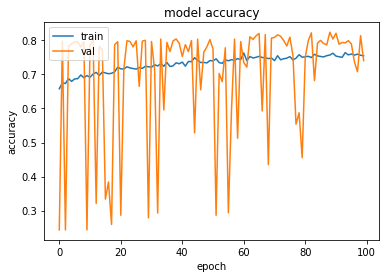

In [35]:
#model accuracy
%matplotlib inline
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

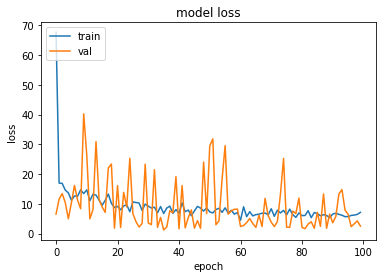

In [36]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [44]:
model.evaluate(X_test_c, y_test_c)

10746/10746 [==============================] - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - 0s 20us/step


[2.425505165012771, 0.7372975945472717]

## Kohonen SOM

In [41]:
import numpy as np
from som import SOM
data = np.array(X_train_c)
som = SOM(data.shape[1], 1)  # initialize the SOM
som.fit(data, 1000, save_e=True, interval=100)  # fit the SOM for 10000 epochs, save the error every 100 steps
som.plot_error_history(filename='som_error.png')  # plot the training error history

targets = np.array(y_train_c)  # create some dummy target values

# now visualize the learned representation with the class labels
som.plot_point_map(data, targets, ['Class 0', 'Class 1'], filename='som.png')
som.plot_class_density(data, targets, t=0, name='Class 0', filename='class_0.png')
som.plot_distance_map(filename='distance_map.png')  # plot the distance map after training

Epoch 0;    Neuron [0, 0];    	Sigma: 21.0000;    alpha: 0.6000
Epoch 1;    Neuron [0, 0];    	Sigma: 21.0000;    alpha: 0.6000
Epoch 2;    Neuron [0, 0];    	Sigma: 21.0000;    alpha: 0.6000
Epoch 3;    Neuron [0, 0];    	Sigma: 21.0000;    alpha: 0.6000
Epoch 4;    Neuron [0, 0];    	Sigma: 21.0000;    alpha: 0.6000
Epoch 5;    Neuron [0, 0];    	Sigma: 21.0000;    alpha: 0.6000
Epoch 6;    Neuron [0, 0];    	Sigma: 21.0000;    alpha: 0.6000
Epoch 7;    Neuron [0, 0];    	Sigma: 21.0000;    alpha: 0.6000
Epoch 8;    Neuron [0, 0];    	Sigma: 21.0000;    alpha: 0.6000
Epoch 9;    Neuron [0, 0];    	Sigma: 21.0000;    alpha: 0.6000
Epoch 10;    Neuron [0, 0];    	Sigma: 21.0000;    alpha: 0.6000
Epoch 11;    Neuron [0, 0];    	Sigma: 21.0000;    alpha: 0.6000
Epoch 12;    Neuron [0, 0];    	Sigma: 21.0000;    alpha: 0.6000
Epoch 13;    Neuron [0, 0];    	Sigma: 21.0000;    alpha: 0.6000
Epoch 14;    Neuron [0, 0];    	Sigma: 21.0000;    alpha: 0.6000
Epoch 15;    Neuron [0, 0];    	Sig

Epoch 125;    Neuron [0, 0];    	Sigma: 20.9180;    alpha: 0.5977
Epoch 126;    Neuron [0, 0];    	Sigma: 20.9153;    alpha: 0.5976
Epoch 127;    Neuron [0, 0];    	Sigma: 20.9126;    alpha: 0.5975
Epoch 128;    Neuron [0, 0];    	Sigma: 20.9098;    alpha: 0.5974
Epoch 129;    Neuron [0, 0];    	Sigma: 20.9070;    alpha: 0.5973
Epoch 130;    Neuron [0, 0];    	Sigma: 20.9041;    alpha: 0.5973
Epoch 131;    Neuron [0, 0];    	Sigma: 20.9011;    alpha: 0.5972
Epoch 132;    Neuron [0, 0];    	Sigma: 20.8981;    alpha: 0.5971
Epoch 133;    Neuron [0, 0];    	Sigma: 20.8950;    alpha: 0.5970
Epoch 134;    Neuron [0, 0];    	Sigma: 20.8918;    alpha: 0.5969
Epoch 135;    Neuron [0, 0];    	Sigma: 20.8885;    alpha: 0.5968
Epoch 136;    Neuron [0, 0];    	Sigma: 20.8852;    alpha: 0.5967
Epoch 137;    Neuron [0, 0];    	Sigma: 20.8818;    alpha: 0.5966
Epoch 138;    Neuron [0, 0];    	Sigma: 20.8784;    alpha: 0.5965
Epoch 139;    Neuron [0, 0];    	Sigma: 20.8748;    alpha: 0.5964
Epoch 140;

Epoch 249;    Neuron [0, 0];    	Sigma: 19.7786;    alpha: 0.5651
Epoch 250;    Neuron [0, 0];    	Sigma: 19.7600;    alpha: 0.5646
Epoch 251;    Neuron [0, 0];    	Sigma: 19.7413;    alpha: 0.5640
Epoch 252;    Neuron [0, 0];    	Sigma: 19.7223;    alpha: 0.5635
Epoch 253;    Neuron [0, 0];    	Sigma: 19.7032;    alpha: 0.5629
Epoch 254;    Neuron [0, 0];    	Sigma: 19.6839;    alpha: 0.5624
Epoch 255;    Neuron [0, 0];    	Sigma: 19.6643;    alpha: 0.5618
Epoch 256;    Neuron [0, 0];    	Sigma: 19.6446;    alpha: 0.5613
Epoch 257;    Neuron [0, 0];    	Sigma: 19.6247;    alpha: 0.5607
Epoch 258;    Neuron [0, 0];    	Sigma: 19.6046;    alpha: 0.5601
Epoch 259;    Neuron [0, 0];    	Sigma: 19.5843;    alpha: 0.5596
Epoch 260;    Neuron [0, 0];    	Sigma: 19.5638;    alpha: 0.5590
Epoch 261;    Neuron [0, 0];    	Sigma: 19.5432;    alpha: 0.5584
Epoch 262;    Neuron [0, 0];    	Sigma: 19.5223;    alpha: 0.5578
Epoch 263;    Neuron [0, 0];    	Sigma: 19.5012;    alpha: 0.5572
Epoch 264;

Epoch 373;    Neuron [0, 0];    	Sigma: 16.0189;    alpha: 0.4577
Epoch 374;    Neuron [0, 0];    	Sigma: 15.9781;    alpha: 0.4565
Epoch 375;    Neuron [0, 0];    	Sigma: 15.9372;    alpha: 0.4553
Epoch 376;    Neuron [0, 0];    	Sigma: 15.8961;    alpha: 0.4542
Epoch 377;    Neuron [0, 0];    	Sigma: 15.8550;    alpha: 0.4530
Epoch 378;    Neuron [0, 0];    	Sigma: 15.8137;    alpha: 0.4518
Epoch 379;    Neuron [0, 0];    	Sigma: 15.7723;    alpha: 0.4506
Epoch 380;    Neuron [0, 0];    	Sigma: 15.7308;    alpha: 0.4495
Epoch 381;    Neuron [0, 0];    	Sigma: 15.6892;    alpha: 0.4483
Epoch 382;    Neuron [0, 0];    	Sigma: 15.6475;    alpha: 0.4471
Epoch 383;    Neuron [0, 0];    	Sigma: 15.6057;    alpha: 0.4459
Epoch 384;    Neuron [0, 0];    	Sigma: 15.5638;    alpha: 0.4447
Epoch 385;    Neuron [0, 0];    	Sigma: 15.5218;    alpha: 0.4435
Epoch 386;    Neuron [0, 0];    	Sigma: 15.4796;    alpha: 0.4423
Epoch 387;    Neuron [0, 0];    	Sigma: 15.4374;    alpha: 0.4411
Epoch 388;

Epoch 497;    Neuron [0, 0];    	Sigma: 10.6054;    alpha: 0.3030
Epoch 498;    Neuron [0, 0];    	Sigma: 10.5632;    alpha: 0.3018
Epoch 499;    Neuron [0, 0];    	Sigma: 10.5210;    alpha: 0.3006
Epoch 500;    Neuron [0, 0];    	Sigma: 10.4790;    alpha: 0.2994
Epoch 501;    Neuron [0, 0];    	Sigma: 10.4370;    alpha: 0.2982
Epoch 502;    Neuron [0, 0];    	Sigma: 10.3952;    alpha: 0.2970
Epoch 503;    Neuron [0, 0];    	Sigma: 10.3534;    alpha: 0.2958
Epoch 504;    Neuron [0, 0];    	Sigma: 10.3117;    alpha: 0.2946
Epoch 505;    Neuron [0, 0];    	Sigma: 10.2701;    alpha: 0.2934
Epoch 506;    Neuron [0, 0];    	Sigma: 10.2286;    alpha: 0.2922
Epoch 507;    Neuron [0, 0];    	Sigma: 10.1871;    alpha: 0.2911
Epoch 508;    Neuron [0, 0];    	Sigma: 10.1458;    alpha: 0.2899
Epoch 509;    Neuron [0, 0];    	Sigma: 10.1045;    alpha: 0.2887
Epoch 510;    Neuron [0, 0];    	Sigma: 10.0634;    alpha: 0.2875
Epoch 511;    Neuron [0, 0];    	Sigma: 10.0223;    alpha: 0.2864
Epoch 512;

Epoch 622;    Neuron [0, 0];    	Sigma: 6.1684;    alpha: 0.1762
Epoch 623;    Neuron [0, 0];    	Sigma: 6.1404;    alpha: 0.1754
Epoch 624;    Neuron [0, 0];    	Sigma: 6.1126;    alpha: 0.1746
Epoch 625;    Neuron [0, 0];    	Sigma: 6.0848;    alpha: 0.1739
Epoch 626;    Neuron [0, 0];    	Sigma: 6.0572;    alpha: 0.1731
Epoch 627;    Neuron [0, 0];    	Sigma: 6.0298;    alpha: 0.1723
Epoch 628;    Neuron [0, 0];    	Sigma: 6.0024;    alpha: 0.1715
Epoch 629;    Neuron [0, 0];    	Sigma: 5.9752;    alpha: 0.1707
Epoch 630;    Neuron [0, 0];    	Sigma: 5.9480;    alpha: 0.1699
Epoch 631;    Neuron [0, 0];    	Sigma: 5.9210;    alpha: 0.1692
Epoch 632;    Neuron [0, 0];    	Sigma: 5.8941;    alpha: 0.1684
Epoch 633;    Neuron [0, 0];    	Sigma: 5.8674;    alpha: 0.1676
Epoch 634;    Neuron [0, 0];    	Sigma: 5.8407;    alpha: 0.1669
Epoch 635;    Neuron [0, 0];    	Sigma: 5.8141;    alpha: 0.1661
Epoch 636;    Neuron [0, 0];    	Sigma: 5.7877;    alpha: 0.1654
Epoch 637;    Neuron [0, 

Epoch 748;    Neuron [0, 0];    	Sigma: 3.4833;    alpha: 0.0995
Epoch 749;    Neuron [0, 0];    	Sigma: 3.4678;    alpha: 0.0991
Epoch 750;    Neuron [0, 0];    	Sigma: 3.4524;    alpha: 0.0986
Epoch 751;    Neuron [0, 0];    	Sigma: 3.4370;    alpha: 0.0982
Epoch 752;    Neuron [0, 0];    	Sigma: 3.4217;    alpha: 0.0978
Epoch 753;    Neuron [0, 0];    	Sigma: 3.4065;    alpha: 0.0973
Epoch 754;    Neuron [0, 0];    	Sigma: 3.3914;    alpha: 0.0969
Epoch 755;    Neuron [0, 0];    	Sigma: 3.3764;    alpha: 0.0965
Epoch 756;    Neuron [0, 0];    	Sigma: 3.3614;    alpha: 0.0960
Epoch 757;    Neuron [0, 0];    	Sigma: 3.3465;    alpha: 0.0956
Epoch 758;    Neuron [0, 0];    	Sigma: 3.3317;    alpha: 0.0952
Epoch 759;    Neuron [0, 0];    	Sigma: 3.3169;    alpha: 0.0948
Epoch 760;    Neuron [0, 0];    	Sigma: 3.3022;    alpha: 0.0943
Epoch 761;    Neuron [0, 0];    	Sigma: 3.2876;    alpha: 0.0939
Epoch 762;    Neuron [0, 0];    	Sigma: 3.2731;    alpha: 0.0935
Epoch 763;    Neuron [0, 

Epoch 874;    Neuron [0, 0];    	Sigma: 2.0244;    alpha: 0.0578
Epoch 875;    Neuron [0, 0];    	Sigma: 2.0160;    alpha: 0.0576
Epoch 876;    Neuron [0, 0];    	Sigma: 2.0077;    alpha: 0.0574
Epoch 877;    Neuron [0, 0];    	Sigma: 1.9994;    alpha: 0.0571
Epoch 878;    Neuron [0, 0];    	Sigma: 1.9912;    alpha: 0.0569
Epoch 879;    Neuron [0, 0];    	Sigma: 1.9830;    alpha: 0.0567
Epoch 880;    Neuron [0, 0];    	Sigma: 1.9749;    alpha: 0.0564
Epoch 881;    Neuron [0, 0];    	Sigma: 1.9668;    alpha: 0.0562
Epoch 882;    Neuron [0, 0];    	Sigma: 1.9587;    alpha: 0.0560
Epoch 883;    Neuron [0, 0];    	Sigma: 1.9506;    alpha: 0.0557
Epoch 884;    Neuron [0, 0];    	Sigma: 1.9427;    alpha: 0.0555
Epoch 885;    Neuron [0, 0];    	Sigma: 1.9347;    alpha: 0.0553
Epoch 886;    Neuron [0, 0];    	Sigma: 1.9268;    alpha: 0.0551
Epoch 887;    Neuron [0, 0];    	Sigma: 1.9189;    alpha: 0.0548
Epoch 888;    Neuron [0, 0];    	Sigma: 1.9111;    alpha: 0.0546
Epoch 889;    Neuron [0, 

Error history plot done!
Point map plot done!
Class density plot done!
Distance map plot done!


Epoch 0;    Neuron [0, 8];    	Sigma: 5.0000;    alpha: 0.6000
Epoch 1;    Neuron [4, 8];    	Sigma: 5.0000;    alpha: 0.6000
Epoch 2;    Neuron [5, 0];    	Sigma: 5.0000;    alpha: 0.6000
Epoch 3;    Neuron [3, 6];    	Sigma: 5.0000;    alpha: 0.6000
Epoch 4;    Neuron [6, 0];    	Sigma: 5.0000;    alpha: 0.6000
Epoch 5;    Neuron [9, 4];    	Sigma: 5.0000;    alpha: 0.6000
Epoch 6;    Neuron [1, 1];    	Sigma: 5.0000;    alpha: 0.6000
Epoch 7;    Neuron [2, 9];    	Sigma: 5.0000;    alpha: 0.6000
Epoch 8;    Neuron [8, 7];    	Sigma: 5.0000;    alpha: 0.6000
Epoch 9;    Neuron [5, 4];    	Sigma: 5.0000;    alpha: 0.6000
Epoch 10;    Neuron [9, 4];    	Sigma: 5.0000;    alpha: 0.6000
Epoch 11;    Neuron [1, 0];    	Sigma: 5.0000;    alpha: 0.6000
Epoch 12;    Neuron [8, 9];    	Sigma: 5.0000;    alpha: 0.6000
Epoch 13;    Neuron [2, 0];    	Sigma: 5.0000;    alpha: 0.6000
Epoch 14;    Neuron [6, 0];    	Sigma: 5.0000;    alpha: 0.6000
Epoch 15;    Neuron [3, 2];    	Sigma: 5.0000;    

Epoch 127;    Neuron [0, 2];    	Sigma: 4.9792;    alpha: 0.5975
Epoch 128;    Neuron [1, 8];    	Sigma: 4.9785;    alpha: 0.5974
Epoch 129;    Neuron [5, 0];    	Sigma: 4.9779;    alpha: 0.5973
Epoch 130;    Neuron [9, 8];    	Sigma: 4.9772;    alpha: 0.5973
Epoch 131;    Neuron [4, 5];    	Sigma: 4.9765;    alpha: 0.5972
Epoch 132;    Neuron [4, 9];    	Sigma: 4.9757;    alpha: 0.5971
Epoch 133;    Neuron [4, 7];    	Sigma: 4.9750;    alpha: 0.5970
Epoch 134;    Neuron [5, 4];    	Sigma: 4.9742;    alpha: 0.5969
Epoch 135;    Neuron [4, 2];    	Sigma: 4.9735;    alpha: 0.5968
Epoch 136;    Neuron [0, 3];    	Sigma: 4.9727;    alpha: 0.5967
Epoch 137;    Neuron [8, 9];    	Sigma: 4.9719;    alpha: 0.5966
Epoch 138;    Neuron [4, 0];    	Sigma: 4.9710;    alpha: 0.5965
Epoch 139;    Neuron [3, 7];    	Sigma: 4.9702;    alpha: 0.5964
Epoch 140;    Neuron [9, 6];    	Sigma: 4.9693;    alpha: 0.5963
Epoch 141;    Neuron [0, 3];    	Sigma: 4.9685;    alpha: 0.5962
Epoch 142;    Neuron [5, 

Epoch 253;    Neuron [6, 4];    	Sigma: 4.6912;    alpha: 0.5629
Epoch 254;    Neuron [9, 9];    	Sigma: 4.6866;    alpha: 0.5624
Epoch 255;    Neuron [2, 8];    	Sigma: 4.6820;    alpha: 0.5618
Epoch 256;    Neuron [1, 3];    	Sigma: 4.6773;    alpha: 0.5613
Epoch 257;    Neuron [4, 2];    	Sigma: 4.6726;    alpha: 0.5607
Epoch 258;    Neuron [8, 5];    	Sigma: 4.6678;    alpha: 0.5601
Epoch 259;    Neuron [9, 9];    	Sigma: 4.6629;    alpha: 0.5596
Epoch 260;    Neuron [1, 7];    	Sigma: 4.6581;    alpha: 0.5590
Epoch 261;    Neuron [6, 4];    	Sigma: 4.6531;    alpha: 0.5584
Epoch 262;    Neuron [5, 9];    	Sigma: 4.6482;    alpha: 0.5578
Epoch 263;    Neuron [8, 7];    	Sigma: 4.6431;    alpha: 0.5572
Epoch 264;    Neuron [4, 2];    	Sigma: 4.6381;    alpha: 0.5566
Epoch 265;    Neuron [2, 4];    	Sigma: 4.6330;    alpha: 0.5560
Epoch 266;    Neuron [6, 9];    	Sigma: 4.6278;    alpha: 0.5553
Epoch 267;    Neuron [0, 2];    	Sigma: 4.6226;    alpha: 0.5547
Epoch 268;    Neuron [8, 

Epoch 379;    Neuron [7, 0];    	Sigma: 3.7553;    alpha: 0.4506
Epoch 380;    Neuron [4, 9];    	Sigma: 3.7454;    alpha: 0.4495
Epoch 381;    Neuron [0, 7];    	Sigma: 3.7355;    alpha: 0.4483
Epoch 382;    Neuron [3, 2];    	Sigma: 3.7256;    alpha: 0.4471
Epoch 383;    Neuron [5, 1];    	Sigma: 3.7156;    alpha: 0.4459
Epoch 384;    Neuron [3, 0];    	Sigma: 3.7057;    alpha: 0.4447
Epoch 385;    Neuron [5, 8];    	Sigma: 3.6957;    alpha: 0.4435
Epoch 386;    Neuron [0, 5];    	Sigma: 3.6856;    alpha: 0.4423
Epoch 387;    Neuron [7, 0];    	Sigma: 3.6756;    alpha: 0.4411
Epoch 388;    Neuron [4, 2];    	Sigma: 3.6655;    alpha: 0.4399
Epoch 389;    Neuron [8, 1];    	Sigma: 3.6554;    alpha: 0.4386
Epoch 390;    Neuron [1, 2];    	Sigma: 3.6453;    alpha: 0.4374
Epoch 391;    Neuron [3, 0];    	Sigma: 3.6351;    alpha: 0.4362
Epoch 392;    Neuron [7, 6];    	Sigma: 3.6250;    alpha: 0.4350
Epoch 393;    Neuron [4, 3];    	Sigma: 3.6148;    alpha: 0.4338
Epoch 394;    Neuron [1, 

Epoch 505;    Neuron [0, 6];    	Sigma: 2.4453;    alpha: 0.2934
Epoch 506;    Neuron [4, 9];    	Sigma: 2.4354;    alpha: 0.2922
Epoch 507;    Neuron [9, 5];    	Sigma: 2.4255;    alpha: 0.2911
Epoch 508;    Neuron [4, 3];    	Sigma: 2.4157;    alpha: 0.2899
Epoch 509;    Neuron [8, 8];    	Sigma: 2.4058;    alpha: 0.2887
Epoch 510;    Neuron [2, 0];    	Sigma: 2.3960;    alpha: 0.2875
Epoch 511;    Neuron [9, 7];    	Sigma: 2.3863;    alpha: 0.2864
Epoch 512;    Neuron [4, 2];    	Sigma: 2.3765;    alpha: 0.2852
Epoch 513;    Neuron [3, 8];    	Sigma: 2.3668;    alpha: 0.2840
Epoch 514;    Neuron [1, 5];    	Sigma: 2.3571;    alpha: 0.2828
Epoch 515;    Neuron [0, 7];    	Sigma: 2.3474;    alpha: 0.2817
Epoch 516;    Neuron [6, 7];    	Sigma: 2.3377;    alpha: 0.2805
Epoch 517;    Neuron [8, 9];    	Sigma: 2.3281;    alpha: 0.2794
Epoch 518;    Neuron [5, 0];    	Sigma: 2.3185;    alpha: 0.2782
Epoch 519;    Neuron [5, 9];    	Sigma: 2.3089;    alpha: 0.2771
Epoch 520;    Neuron [2, 

Epoch 631;    Neuron [4, 4];    	Sigma: 1.4098;    alpha: 0.1692
Epoch 632;    Neuron [5, 2];    	Sigma: 1.4034;    alpha: 0.1684
Epoch 633;    Neuron [2, 9];    	Sigma: 1.3970;    alpha: 0.1676
Epoch 634;    Neuron [4, 9];    	Sigma: 1.3906;    alpha: 0.1669
Epoch 635;    Neuron [8, 6];    	Sigma: 1.3843;    alpha: 0.1661
Epoch 636;    Neuron [3, 8];    	Sigma: 1.3780;    alpha: 0.1654
Epoch 637;    Neuron [0, 1];    	Sigma: 1.3718;    alpha: 0.1646
Epoch 638;    Neuron [6, 6];    	Sigma: 1.3655;    alpha: 0.1639
Epoch 639;    Neuron [3, 6];    	Sigma: 1.3593;    alpha: 0.1631
Epoch 640;    Neuron [1, 4];    	Sigma: 1.3531;    alpha: 0.1624
Epoch 641;    Neuron [4, 5];    	Sigma: 1.3470;    alpha: 0.1616
Epoch 642;    Neuron [8, 8];    	Sigma: 1.3409;    alpha: 0.1609
Epoch 643;    Neuron [0, 8];    	Sigma: 1.3348;    alpha: 0.1602
Epoch 644;    Neuron [3, 1];    	Sigma: 1.3287;    alpha: 0.1594
Epoch 645;    Neuron [1, 4];    	Sigma: 1.3226;    alpha: 0.1587
Epoch 646;    Neuron [7, 

Epoch 757;    Neuron [2, 8];    	Sigma: 0.7968;    alpha: 0.0956
Epoch 758;    Neuron [2, 0];    	Sigma: 0.7933;    alpha: 0.0952
Epoch 759;    Neuron [4, 8];    	Sigma: 0.7897;    alpha: 0.0948
Epoch 760;    Neuron [4, 9];    	Sigma: 0.7862;    alpha: 0.0943
Epoch 761;    Neuron [3, 7];    	Sigma: 0.7828;    alpha: 0.0939
Epoch 762;    Neuron [2, 6];    	Sigma: 0.7793;    alpha: 0.0935
Epoch 763;    Neuron [1, 0];    	Sigma: 0.7759;    alpha: 0.0931
Epoch 764;    Neuron [8, 7];    	Sigma: 0.7724;    alpha: 0.0927
Epoch 765;    Neuron [3, 9];    	Sigma: 0.7690;    alpha: 0.0923
Epoch 766;    Neuron [3, 7];    	Sigma: 0.7656;    alpha: 0.0919
Epoch 767;    Neuron [0, 3];    	Sigma: 0.7622;    alpha: 0.0915
Epoch 768;    Neuron [3, 9];    	Sigma: 0.7589;    alpha: 0.0911
Epoch 769;    Neuron [0, 3];    	Sigma: 0.7555;    alpha: 0.0907
Epoch 770;    Neuron [4, 7];    	Sigma: 0.7522;    alpha: 0.0903
Epoch 771;    Neuron [3, 3];    	Sigma: 0.7489;    alpha: 0.0899
Epoch 772;    Neuron [1, 

Epoch 883;    Neuron [7, 8];    	Sigma: 0.4644;    alpha: 0.0557
Epoch 884;    Neuron [3, 0];    	Sigma: 0.4625;    alpha: 0.0555
Epoch 885;    Neuron [3, 9];    	Sigma: 0.4606;    alpha: 0.0553
Epoch 886;    Neuron [7, 5];    	Sigma: 0.4588;    alpha: 0.0551
Epoch 887;    Neuron [7, 8];    	Sigma: 0.4569;    alpha: 0.0548
Epoch 888;    Neuron [9, 5];    	Sigma: 0.4550;    alpha: 0.0546
Epoch 889;    Neuron [8, 9];    	Sigma: 0.4532;    alpha: 0.0544
Epoch 890;    Neuron [4, 4];    	Sigma: 0.4513;    alpha: 0.0542
Epoch 891;    Neuron [1, 4];    	Sigma: 0.4495;    alpha: 0.0539
Epoch 892;    Neuron [3, 1];    	Sigma: 0.4476;    alpha: 0.0537
Epoch 893;    Neuron [5, 3];    	Sigma: 0.4458;    alpha: 0.0535
Epoch 894;    Neuron [2, 5];    	Sigma: 0.4440;    alpha: 0.0533
Epoch 895;    Neuron [7, 5];    	Sigma: 0.4422;    alpha: 0.0531
Epoch 896;    Neuron [4, 0];    	Sigma: 0.4404;    alpha: 0.0528
Epoch 897;    Neuron [6, 3];    	Sigma: 0.4386;    alpha: 0.0526
Epoch 898;    Neuron [7, 

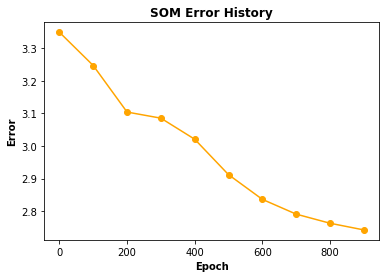

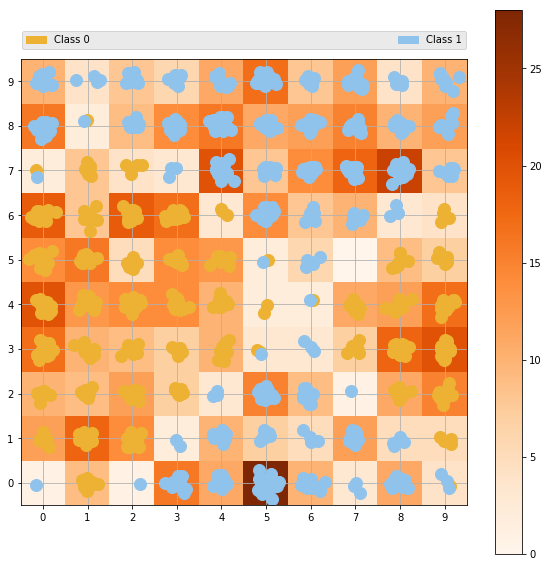

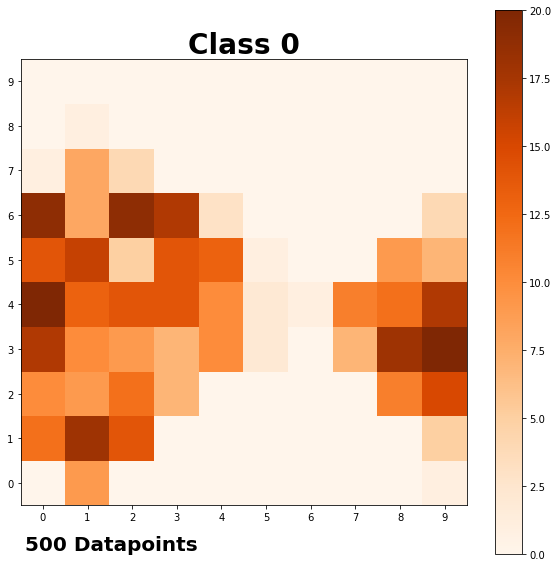

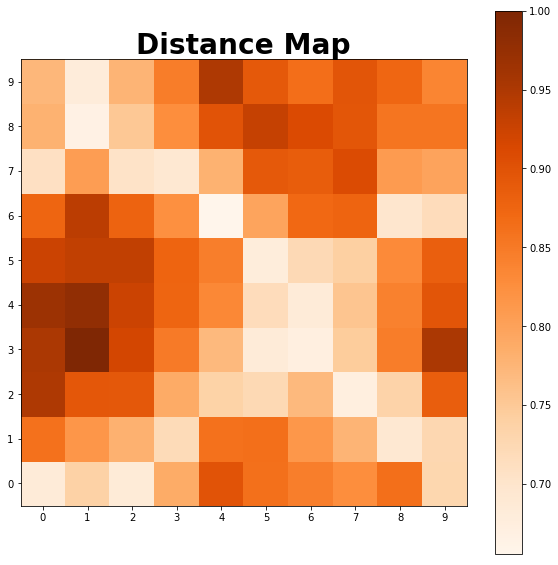

In [43]:
import numpy as np
from som import SOM

# generate some random data with 36 features
data1 = np.random.normal(loc=-.25, scale=0.5, size=(500, 36))
data2 = np.random.normal(loc=.25, scale=0.5, size=(500, 36))
data = np.vstack((data1, data2))

som = SOM(10, 10)  # initialize the SOM
som.fit(data, 1000, save_e=True, interval=100)  # fit the SOM for 10000 epochs, save the error every 100 steps
som.plot_error_history()  # plot the training error history

targets = np.array(500 * [0] + 500 * [1])  # create some dummy target values

# now visualize the learned representation with the class labels
som.plot_point_map(data, targets, ['Class 0', 'Class 1'])
som.plot_class_density(data, targets, t=0, name='Class 0')
som.plot_distance_map()  # plot the distance map after training